In [1]:
print("Team - 5")
print("Project Name - Heart Disease Prediction System.")
print("Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.")
print("Dataset used - \'framingham.csv'")

Team - 5
Project Name - Heart Disease Prediction System.
Module - Preprocessing, Data Cleaning and Exploratory Data Analysis.
Dataset used - 'framingham.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\HP\Downloads/framingham.csv")

In [4]:
print(data.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [5]:
x=data.iloc[:,0:16].values
y=data.iloc[:,5].values
print(x)
print(y)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]
[ 0.  0.  0. ... nan  0.  0.]


In [6]:
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

In [7]:
print(data.shape)

(4238, 16)


In [8]:
# Checking for the missing values.
data.isnull().values.any()

True

In [9]:
missing_value_count_by_column=(data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column>0])

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [10]:
#Dropping columns with missing values
#data_without_missing_values=data.dropna(axis=1)
cols_with_missing=[col for col in data.columns if data[col].isnull().any()]
reduced_original_data=data.drop(cols_with_missing,axis=1)
reduced_test_data=data.drop(cols_with_missing,axis=1)

In [11]:
from sklearn.impute import SimpleImputer
my_imputer=SimpleImputer()
data_with_imputed_values=my_imputer.fit_transform(data)

In [12]:
#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


In [13]:
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  
print(y)

[0 0 0 ... 2 0 0]


In [14]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [15]:
print(x_train)

[[  1.  63.   1. ...  75. 120.   0.]
 [  1.  52.   1. ...  66.  77.   0.]
 [  1.  38.   2. ...  76.  75.   0.]
 ...
 [  1.  39.   3. ...  70.  81.   0.]
 [  0.  57.   1. ...  75.  81.   0.]
 [  0.  40.   2. ...  75.  73.   0.]]


In [16]:
print(x_test)

[[  0.  47.   1. ...  75.  62.   0.]
 [  0.  58.   2. ...  60.  73.   0.]
 [  0.  61.   2. ...  57.  78.   0.]
 ...
 [  1.  50.   3. ...  88.  77.   0.]
 [  1.  45.   4. ...  83. 105.   0.]
 [  0.  50.   1. ...  63.  75.   0.]]


In [17]:
print(y_train)

[0 0 0 ... 0 0 0]


In [18]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [19]:
#To fill in missing values by their mean values
data.fillna(data.mean(),inplace=True)

In [20]:
print(data)

      male  age  education  currentSmoker  cigsPerDay   BPMeds  \
0        1   39        4.0              0         0.0  0.00000   
1        0   46        2.0              0         0.0  0.00000   
2        1   48        1.0              1        20.0  0.00000   
3        0   61        3.0              1        30.0  0.00000   
4        0   46        3.0              1        23.0  0.00000   
...    ...  ...        ...            ...         ...      ...   
4233     1   50        1.0              1         1.0  0.00000   
4234     1   51        3.0              1        43.0  0.00000   
4235     0   48        2.0              1        20.0  0.02963   
4236     0   44        1.0              1        15.0  0.00000   
4237     0   52        2.0              0         0.0  0.00000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    

In [21]:
# Checking for the imbalanced data based on age.
data['age'].value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
49    132
54    132
56    123
57    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

In [22]:
# Checking for any correlations.
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017126,0.197596,0.316807,-0.052204,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.163613,-0.213748,-0.192366,0.121980,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
education,0.017126,-0.163613,1.000000,0.018301,0.007962,-0.010607,-0.035110,-0.080993,-0.038146,-0.022507,-0.128260,-0.061755,-0.135635,-0.053626,-0.033721,-0.053384
currentSmoker,0.197596,-0.213748,0.018301,1.000000,0.766970,-0.048632,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316807,-0.192366,0.007962,0.766970,1.000000,-0.045826,-0.032706,-0.065947,-0.037063,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088,0.057775
BPMeds,-0.052204,0.121980,-0.010607,-0.048632,-0.045826,1.000000,0.115003,0.259243,0.051571,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905,0.086774
prevalentStroke,-0.004546,0.057655,-0.035110,-0.032988,-0.032706,0.115003,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.080993,-0.103260,-0.065947,0.259243,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.038146,-0.044295,-0.037063,0.051571,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.022507,-0.046285,-0.026025,0.078909,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624


<AxesSubplot:>

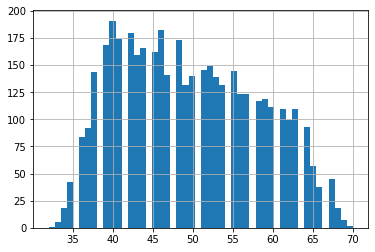

In [23]:
# histogram of age.
data['age'].hist(bins=50)

<AxesSubplot:>

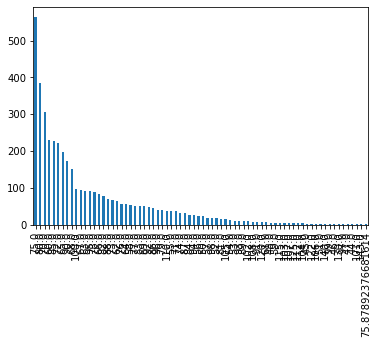

In [29]:
# bar chart -  distribution of a categorical variable
data['heartRate'].value_counts().plot.bar()

<AxesSubplot:xlabel='age', ylabel='count'>

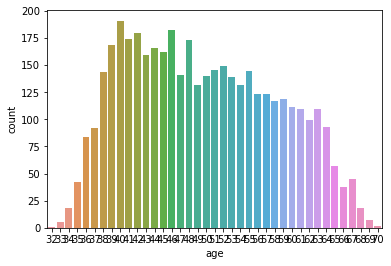

In [24]:
sns.countplot(x='age', data=data)

In [30]:
# Checking for the imbalanced data based on prevalentStroke.
data['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [31]:
# Checking for the missing values.
data.isnull().values.any()

False

In [32]:
print("The Dataset \'framingham.csv' is now cleaned")

The Dataset 'framingham.csv' is now cleaned
